In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Read in the data
df = pd.read_csv('movie/movies.csv')

In [8]:
#Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [22]:
#Look at how many nulls in each column
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [47]:
#Drop nulls
df = df.dropna()

In [62]:
#Extract release date in released column and change datatype to datetime
df['release_year'] = df['released'].apply(lambda x:x.split(' (')[0])
df['release_year'] = pd.to_datetime(df['release_year'])

In [67]:
#Year columnn does not match year in released date
df['year_fixed'] = df['release_year'].dt.year

In [75]:
#Check for duplicates
df.duplicated().sum()

0

In [76]:
#Test correlation between variables
#Hypothesis
#High correlation between budget and gross
#High correlation between company and gross

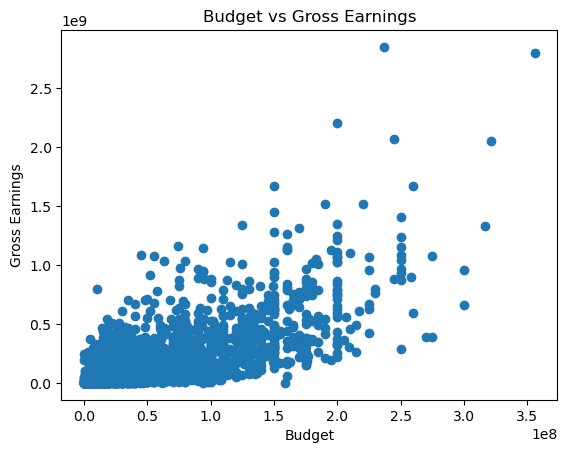

In [78]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

In [79]:
df.sort_values(by='gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year,year_fixed
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015-01-15,2015
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994-06-04,1994
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001-05-11,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982-03-12,1982


<Axes: xlabel='budget', ylabel='gross'>

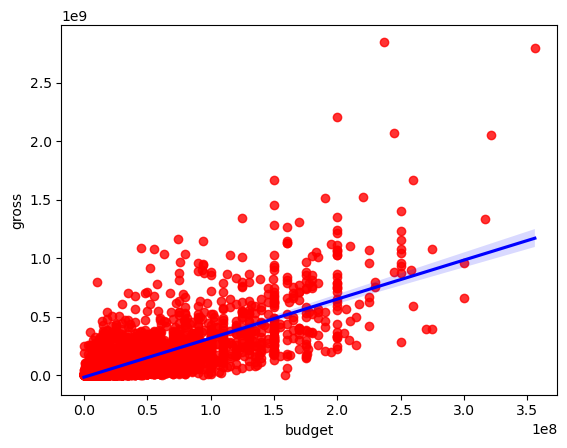

In [82]:
#regression line budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [83]:
#Look at correlation between numeric variables
df.corr()

C:\Users\edluk\AppData\Local\Temp\ipykernel_11784\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,year_fixed
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_fixed,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


C:\Users\edluk\AppData\Local\Temp\ipykernel_11784\455728995.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


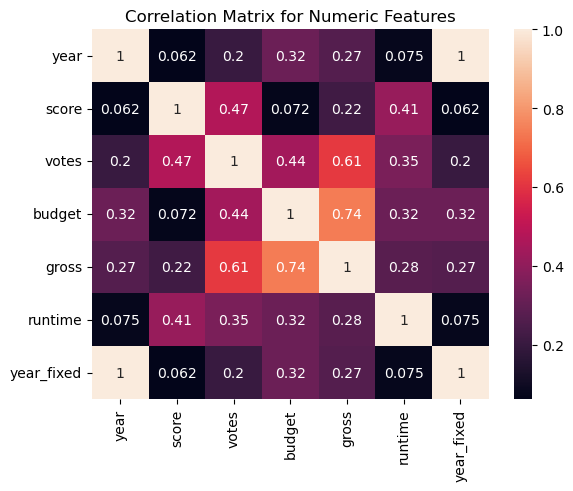

In [89]:
#Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [90]:
#Assign string columns a numeric value
df_num = df

for col in df_num.columns:
    if df_num[col].dtype == 'object':
        df_num[f'{col}_num'] = df_num[col].astype('category')
        df_num[f'{col}_num'] = df_num[f'{col}_num'].cat.codes

df_num

In [92]:
#correlation on gross vs other variables
df_num.corr()

C:\Users\edluk\AppData\Local\Temp\ipykernel_11784\555087316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num.corr()


,year,score,votes,budget,gross,runtime,year_fixed,name_num,rating_num,genre_num,released_num,director_num,writer_num,star_num,country_num,company_num
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,0.025542,0.022021,-0.069147,-0.005989,-0.037371,-0.025495,-0.032687,-0.073569,-0.018806
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923,0.014450,0.065983,0.035106,0.045874,0.005413,0.012843,0.007296,-0.043051,0.020656
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098,0.012615,0.006031,-0.135990,0.028833,-0.010376,-0.005316,-0.017638,0.041551,0.118470
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312,0.023392,-0.203946,-0.368523,0.019952,-0.009662,-0.039466,-0.021473,0.052977,0.170235
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721,0.005639,-0.181906,-0.244101,0.008501,-0.029560,-0.035885,-0.000004,0.060078,0.149553
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294,0.010850,0.140792,-0.059237,0.008975,0.017433,-0.017561,0.010108,-0.034477,0.037585
year_fixed,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,0.025542,0.022021,-0.069147,-0.005989,-0.037371,-0.025495,-0.032687,-0.073569,-0.018806
name_num,0.025542,0.014450,0.012615,0.023392,0.005639,0.010850,0.025542,1.000000,-0.029234,0.010996,-0.006152,0.015246,0.012880,-0.006882,-0.025490,0.021697
rating_num,0.022021,0.065983,0.006031,-0.203946,-0.181906,0.140792,0.022021,-0.029234,1.000000,0.147796,0.018083,0.014656,-0.003149,0.009196,0.008230,-0.092357
genre_num,-0.069147,0.035106,-0.135990,-0.368523,-0.244101,-0.059237,-0.069147,0.010996,0.147796,1.000000,0.022142,-0.008553,0.017578,0.003341,-0.009164,-0.071334


C:\Users\edluk\AppData\Local\Temp\ipykernel_11784\1092290077.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_num.corr(), annot=True)


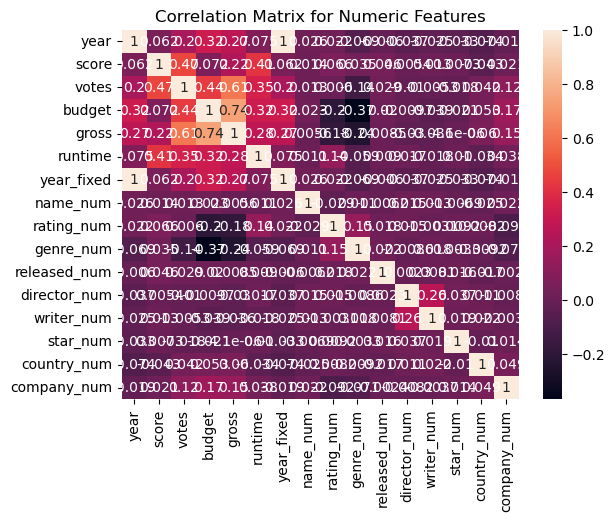

In [93]:
#Heat map of correlation
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [97]:
#Correlation of gross vs other variables, sorted
df_num.corrwith(df['gross']).sort_values(ascending=False)

C:\Users\edluk\AppData\Local\Temp\ipykernel_11784\2245896260.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num.corrwith(df['gross']).sort_values(ascending=False)


gross           1.000000
budget          0.740247
votes           0.614751
runtime         0.275796
year            0.268721
year_fixed      0.268721
score           0.222556
company_num     0.149553
country_num     0.060078
released_num    0.008501
name_num        0.005639
star_num       -0.000004
director_num   -0.029560
writer_num     -0.035885
rating_num     -0.181906
genre_num      -0.244101
dtype: float64

In [1]:
# votes and budget have highest correlation to gross earnings

#company has low correlation to gross earnings